<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/Classification_of_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification
* Classification is a technique of predicting a thing (whether this or that). There can be multiple things.
* Three categories ie
  * Binary Classification
  * Multi-class Classification
  * Multi-label Classification

### 1. Preparing Classification Data
* The data worked on is a toy dataset ie which is a smaller dataset for experimenting and practicing fundamnetals of NN classification.

In [1]:
import sklearn

In [2]:
sklearn.__version__

'1.6.1'

In [3]:
from sklearn.datasets import make_circles

# Making 10000 samples
n_samples = 10000

# Creating circles and storing in X and y
X, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)

In [4]:
len(X), len(y)

(10000, 10000)

In [5]:
print(f"First 5 samples X:\n {X[:5]}")
print(f"First 5 samples y:\n {y[:5]}")

First 5 samples X:
 [[ 0.07878909  0.84129891]
 [ 1.06031373 -0.46442377]
 [-0.59360512  0.77566784]
 [ 1.00937035 -0.3295898 ]
 [ 0.83372061 -0.53454934]]
First 5 samples y:
 [1 0 0 0 0]


In [6]:
# Making a DataFrame by importing pandas, and setting X(features) values as X1,X2 and y(labels) values as label using a python dictionary
import pandas as pd
import numpy as np

circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head(5)

,X1,X2,label
0,0.078789,0.841299,1
1,1.060314,-0.464424,0
2,-0.593605,0.775668,0
3,1.009370,-0.329590,0
4,0.833721,-0.534549,0


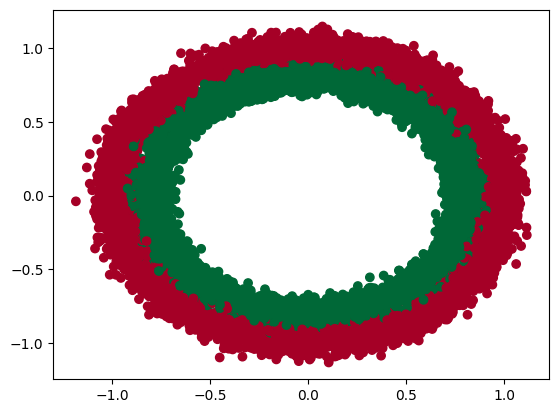

In [7]:
# Using matplotlib for visualizing
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlGn);


In [8]:
X.shape, y.shape

((10000, 2), (10000,))

### Viewing the values of first samples of X and y. Then viewing the shapes of those samples (X first sample shape would be 2 as it has two features and y first sample shape would be none as it is a scalar)

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"Values of first sample of X: {X_sample} and first sample of y: {y_sample}")
print(f"Shapes of first sample of X: {X_sample.shape} and first sample of y: {y_sample.shape}")

Values of first sample of X: [0.07878909 0.84129891] and first sample of y: 1
Shapes of first sample of X: (2,) and first sample of y: ()


## 1.1 Turning Data into tensors
* The data created is in numpy array format
* The dtype of numpy array is int64, and to change to tensor, the default dtype is float32
* Changing the sample of X and y from numpy array to tensors using type

In [10]:
y.dtype

dtype('int64')

In [11]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:10], y[:10]

(tensor([[ 0.0788,  0.8413],
         [ 1.0603, -0.4644],
         [-0.5936,  0.7757],
         [ 1.0094, -0.3296],
         [ 0.8337, -0.5345],
         [-0.1630,  0.7638],
         [ 0.7991,  0.6348],
         [ 0.6887,  0.1558],
         [-0.1275,  0.8003],
         [ 0.8481,  0.4934]]),
 tensor([1., 0., 0., 0., 0., 1., 0., 1., 1., 0.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### 1.2 Splittin data into training and testing

In [18]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

## 2. Building a Model
* Before buildin a model, we must figure out:
  * Setting up an device agnostic code, so that the code will run on GPU (if GPU is available)
  * Constructing a model by subclassing the nn.Module which is a base class
    * nn.Module as subclass
    * nn.Linear() layer for handling shapes of data
    * Defining a forward method for forward pass of model
    * Instantiating the model
  * Defining a loss function and optimizer
  * Creating a training loop and testing loop

In [22]:
import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [23]:
# Constructing a Model by using nn.Module as subclass
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    # Creating 2 nn.Linear() layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # TAKES IN 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and outputs 1 feature

  # Defining a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  # Instantiating an instance
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
device

'cuda'

In [25]:
next(model_1.parameters()).device

device(type='cuda', index=0)